In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
import random
np.random.seed(1234)
random.seed(1234)

In [7]:
##데이터의 행과 열 확인
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [8]:
# pd 에서 표시되는 행과 열 갯수 제한 변경
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [9]:
# train df 의 앞의 자료 확인
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# test df 의 앞의 자료 확인
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


|변수명|뜻|의미|
|:------:|:---:|:---:|
|Survived|생존여부|0 = 사망, 1 = 생존|
|Pclass|티켓 등급|1 = 1등석, 2 = 2등석, 3 = 3등석|
|Sex|성별| |
|Age|나이| |
|SibSp|승선중인 형제나 배우자 수| |
|Parch|승선중인 부모나 자녀 수| |
|Ticket|티켓 번호| |
|Fare|요금| |
|Cabin|방 번호| |
|Embarked|승선한 항구 이름|C = Cherbourg, Q = Queenstown, S = Southampton|

In [11]:
# 데이터 속성 확인
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# 데이터 값 대략 분석하기
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
# 특정 카테고리 별로 변수 확인하기
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train_df["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
E101           3
              ..
F G63          1
C82            1
B50            1
A31            1
C86            1
Name: Cabin, Length: 147, dtype: int64

In [17]:
# 각 카테고리 별로 빈 값 얼마나 있는지 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
# 데이터 시각화 하기
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 표시 스타일 지정하기
plt.style.use("ggplot")

In [21]:
# 임의의 열 데이터 추출
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [22]:
# 비어있는 값 있는 행 제거
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [23]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [24]:
# 수직 데이터를 수평으로 변환
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()

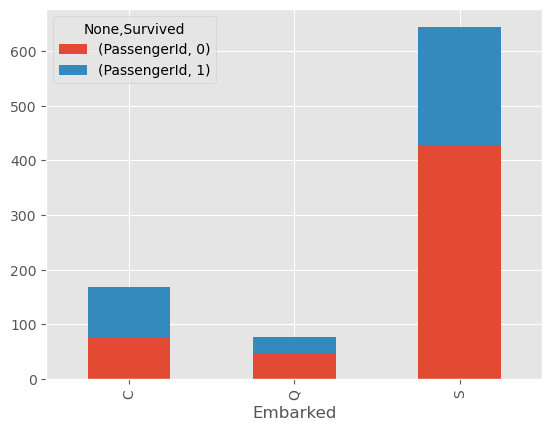

In [25]:
# 막대 그래프로 시각화
embarked_df.plot.bar(stacked = True)

In [26]:
#새로운 변수 survived_rate 추가하여 확인하기
embarked_df["survived_rate"] = embarked_df.iloc[:, 1] / (embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

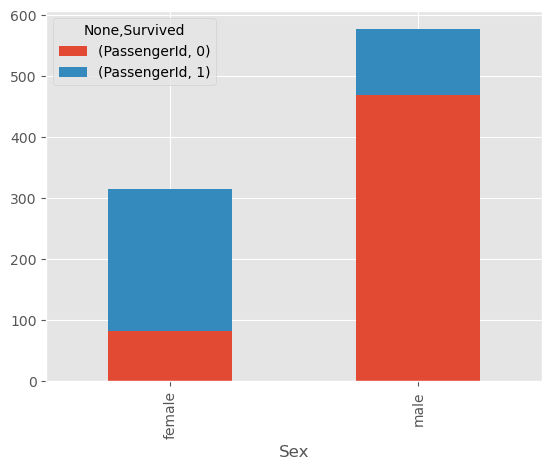

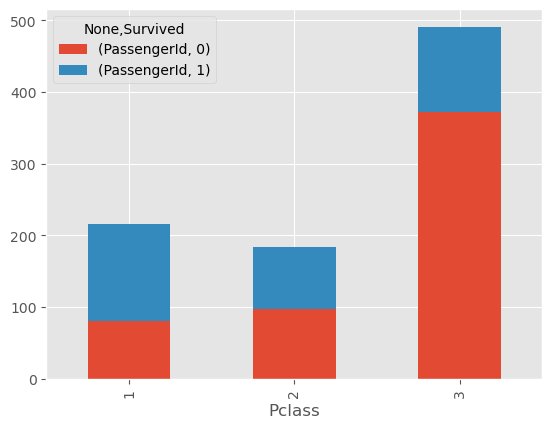

In [27]:
#성별과 티켓 등급 시각화
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked = True)

ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

이를 통해서 보면 티켓 등급이 높을수록 생존 비율이 높고 남성보다 여성이 더 많이 생존했다는 것을 알 수 있다

C:\Users\leedo\anaconda3\envs\kaggle_book\lib\site-packages\numpy\core\fromnumeric.py:3202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\leedo\anaconda3\envs\kaggle_book\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


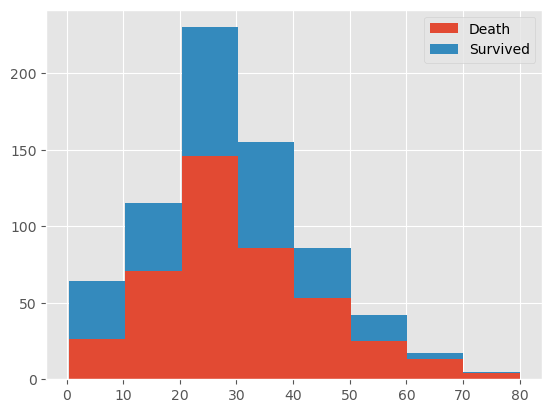

In [28]:
#연령별 생존율
#나이의 경우 연속적이기 때문에 히스토그램을 통해서 데이터 분석을 해야한다
plt.hist(x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived == 1]],
         bins = 8, histtype = 'barstacked', label = ["Death", "Survived"])
plt.legend()

Survived와 변수간의 상관성을 분석하기 위해서는 Sex나 Embarked등의 숫자가 아닌데이터를 숫자로 변환시켜야 한다.

각 카테고리 변수를 수치 데이터로 변환하기 위해서는 원 핫 인코딩을 이용하면 된다.

원 핫 인코딩이란 카테고리 변수에 대해 그 값이 맞는지 여부를 1 또는 0으로 나타내는 방법이다

In [29]:
train_df_corr = pd.get_dummies(train_df, columns = ["Sex"])
train_df_corr = pd.get_dummies(train_df_corr, columns = ["Embarked"])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [30]:
#위에서 다듬을 데이터를 바탕으로 각 계수들간의 상관관계에 대하여 분석
train_corr = train_df_corr.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359


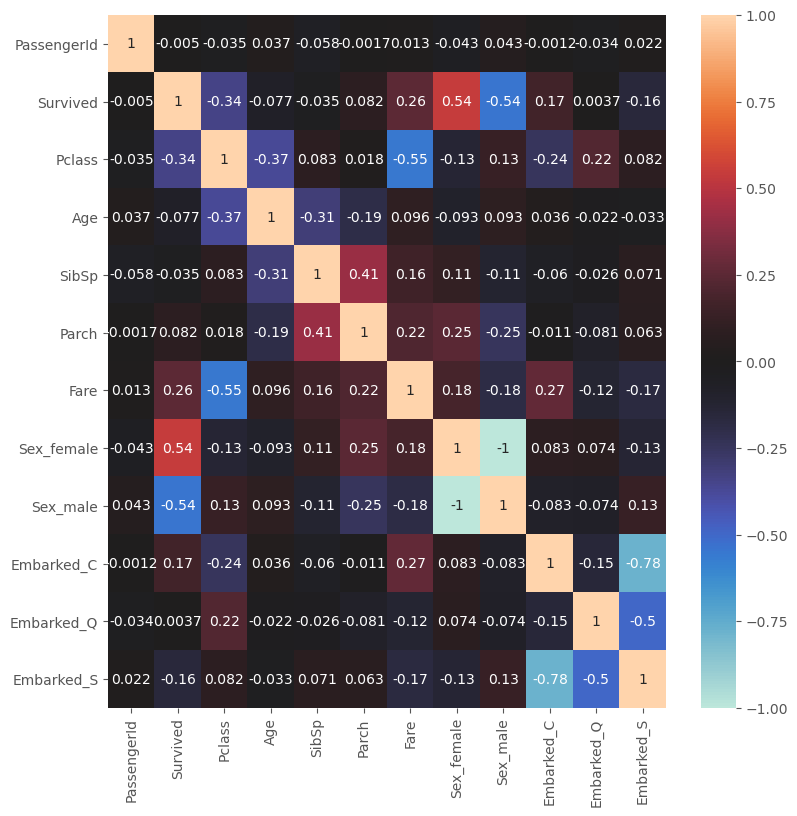

In [31]:
#히트맵으로 위의 상관관계를 시각화
plt.figure(figsize = (9, 9))
sns.heatmap(train_corr, vmax = 1, vmin = -1, center = 0, annot = True)

이를 통해서 성별이 가장 상관관계가 높고 그 다음이 티켓 등급이 Survived와 상관관계가 높다고 할 수있다.

그리고 Fare도 나름의 영향이 없지는 않다고 볼 수 있다.

다만 이러한 상관관계는 어디까지나 참고하면 좋은 것이고 실제로 연관이 있지만 표시되지 않는 경우도 있을 수 있음

In [32]:
#전제 데이터 통합
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
Fare_mean

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [34]:
Fare_mean.columns = ["Pclass", "Fare_mean"]
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [35]:
# Fare의 빈 값 채우기
all_df = pd.merge(all_df, Fare_mean, on = "Pclass", how = "left")
all_df.loc[(all_df["Fare"].isnull()),"Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis = 1)
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

pd.merge 에서 all_df과 Fare_mean을 on(Pclass)을 기준으로 데이터를 묶고

Fare의 값이 null인 위치의 Fare값을 Fare_mean값으로 대치한다

그리고 Fare_mean을 제거하고 결과가 잘 되었는지 확인한다

In [36]:
#이름을 변수화
name_df = all_df["Name"].str.split("[,.]", 2, expand = True)
name_df

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [37]:
name_df.columns = ["family_name", "honorific", "name"]
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [38]:
for data in name_df.columns:
    name_df[data] = name_df[data].str.strip()

이름의 경우 성, 호칭, 이름 순으로 나오기 때문에 이를 분리해서 이름의 data frame을 만들었다

In [39]:
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Dona              1
Lady              1
Jonkheer          1
Don               1
Capt              1
the Countess      1
Sir               1
Name: honorific, dtype: int64

In [40]:
#이름을 all_df에 가로로 추가
all_df = pd.concat([all_df, name_df], axis = 1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


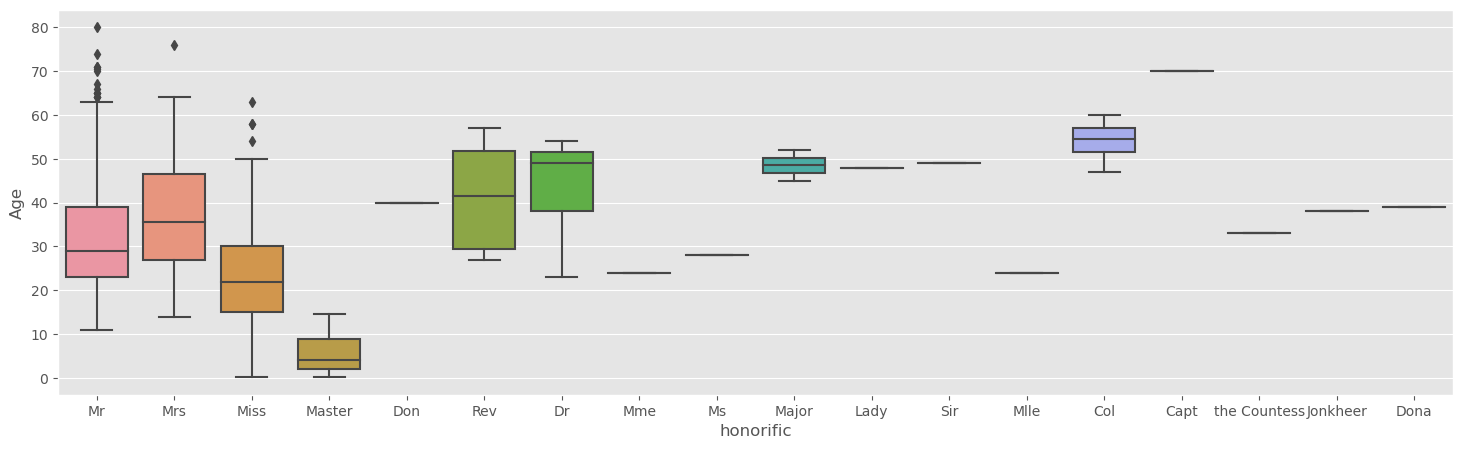

In [41]:
# boxplot으로 all_df의 호칭별 분포 시각화
plt.figure(figsize = (18, 5))
sns.boxplot(x = "honorific", y = "Age", data = all_df)

In [42]:
# 호칭별 생존율 차이 확인
#원래 dataframe에 name_df 결합
train_df = pd.concat([train_df, name_df[:len(train_df)].reset_index(drop = True)], axis = 1)
test_df = pd.concat([test_df, name_df[len(test_df):].reset_index(drop = True)], axis = 1)

name_df는 train과 test를 합친 all_df에서 구한것 이므로 각각에 해당하는 부분만 빼서 결합해야한다

reset_index 하는 이유는 dataframe이 다양한 전처리 과정을 거치게 되면 인덱스가 섞이게 되는데
그때 인덱스를 다시 처음부터 재배열 하기위해서이다.

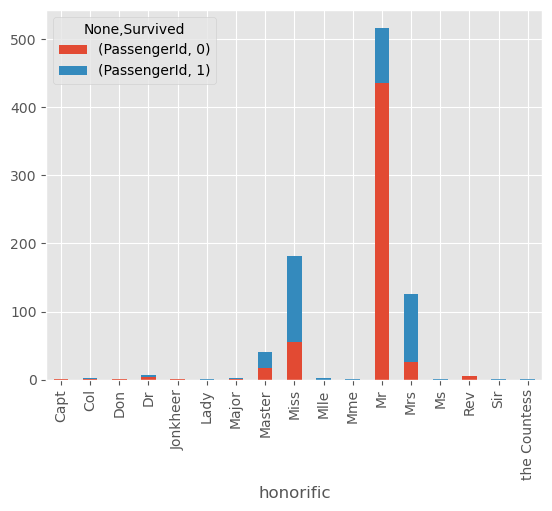

In [43]:
# 호칭별 생존여부 시각화
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked = True)

In [44]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
dtype: int64

In [45]:
#연령의 결측치를 호칭별 평균 연령으로 채우기
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on = "honorific", how = "left")
all_df.loc[(all_df["Age"].isnull()),"Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis = 1)
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
dtype: int64

In [46]:
# 가족 인원수 추가하기
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [47]:
# 혼자 배에 탔는지 변수 추가하기
all_df.loc[all_df["family_num"] == 0, "alone"] = 1
all_df["alone"].fillna(0, inplace = True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,0,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,0,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,0,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,0,1.0


이제 필요 없는 데이터를 제거한다

PassengerId의 경우 단순히 승객정보임으로 예측에 의미가 없다

Name의 경우 우리가 family_name, honorific, name으로 분리하였기 때문에 중복되는 내용이다

그리고 분할한 name의 경우도 단순히 승객의 정보임으로 예측에 의미가 없다

또한 family_name의 경우도 여러명을 작은 그룹으로 묶을 수 있는 것이 아니라 많은 그룹으로 조금의 사람이 묶이기 때문에 이를 이용하여 어떤 경우가 결과에 영향을 미치는지 판단하기 어렵다

Ticket의 경우도 단지 고객 정보이기 때문에 예측 의미가 없다

마지막으로 Cabin의 경우 데이터의 총 수가 1300여개인데 결손이 1000개가 넘어서 제대로 값을 알지 못함으로 의미가 없다

In [48]:
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis = 1)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [49]:
# 숫자가 아닌 카테고리를 수치로 변환
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [50]:
# honorific에서 적은 비중 차지하는 호칭을 other로 묶기
all_df.loc[~((all_df["honorific"] == "Mr") | (all_df["honorific"] == "Miss") | (all_df["honorific"] == "Mrs") |
             (all_df["honorific"] == "Master")),"honorific"] = "other"
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

문자열을 수치로 변환할때 위의 pd.get_dummies()를 사용해 원 핫 인코딩을 하는 방법도 있지만
라벨 인코딩 기법을 사용할 수도 있다.

라벨 인코딩은 각 카테고리명을 임의의 숫자로 대체하는 방법이다

원 핫 인코딩의 경우는 카테고리의 수에 따라 변수가 증가하지만 라벨 인코딩은 변수는 그대로 유지하면서 수치로 바꿀 수 있다

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# Embarked에 비어있는 곳을 missing으로 채움
all_df["Embarked"].fillna("missing", inplace=True)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [53]:
all_df.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
honorific       0
family_num      0
alone           0
dtype: int64

In [54]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])
all_df.head()

Sex
Embarked
honorific


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [55]:
# 데이터를 학습 데이터와 테스트 데이터로 만들기
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis = 1).reset_index(drop = True)
train_Y = train_df["Survived"]
test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis = 1).reset_index(drop = True)

Survived의 값이 null이 아닌경우는 학습데이터로 하고 null인 경우는 테스트 데이터로 하고
Survived의 값을 목적변수로 한다

# LightGBM

 결정 트리: 역치 조건에 따라 뎅터 분기를 반복하는 것으로 주로 회귀 및 분류에 사용한다.
 
 결정 트리의 경우 이상치에 민감하고 첫 분기에서 한쪽으로 치우치게 된다면 그 뒤 값들의 정확도가 모두 나빠지게 되는 단점이 있다.
 
 따라서 결정트리를 여러개 만들어 앙상블하는 랜덤 포레스트 방법을 사용하는 것이 좋다
 
 이때 병렬로 결정트리를 앙상블하는 것이 아니라 결정트리를 순서대로 갱신하는 그레디언트 부스팅 결정 트리라는 기법이 있는데 이것을 구현하는 방법중의 하나가 LightGBM이다
 

In [56]:
import lightgbm as lgb

#### 과대적합을 피하려면
학습 데이터에서 검증 데이터를 분리해서 학습 데이터로 학습한 모델을 검증 데이터로 검증을 하는 방법을 사용하면 좋다

 - 홀드 아웃 : 데이터를 일정 비율로 학습 데이터와 검증 데이터를 분할하는 방법이다.<br>다만 검증 데이터에 과대적합하는 경우가 생길 수 있다는 단점이 있다
<br> 

 - 교차 검증 : 데이터 전체를 임의의 수의 블록으로 분할해서 그 중 한개의 블록을 검증데이터로 활용하고 나머지는 학습데이터로 사용하는 방법이다.<br>홀드 아웃에 비해 모델의 일반화는 더 잘 되지만 분할 횟수에 따라 시간이 오래걸릴수도 있다는 단점이 있다
<br> 
 
 - 잭나이프법 : 데이터 수가 적을 때 이용하는 검증방법으로 전체 테스트 데이터중 하나를 검증 데이터로 하고 나머지를 학습 데이터로 하는 과정을 전체 데이터 수만큼 반복하는 방법이다
 
 

In [57]:
# 학습 데이터중 20%를 검증 데이터로 분할하기
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
X_train, X_vaild, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2)

In [58]:
# 카테고리 변수를 지정하여 LightGBM용 데이터세트 생성하기
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = categories)
lgb_eval = lgb.Dataset(X_vaild, y_valid, categorical_feature = categories, reference = lgb_train)

In [59]:
# 하이퍼파라미터 설정
lgbm_params = {
    "objective" : "binary",
    "random_seed" : 1234
}

In [60]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets = lgb_eval,
                      num_boost_round = 100,
                      early_stopping_rounds = 20,
                      verbose_eval = 10
                      )

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.465597
[20]	valid_0's binary_logloss: 0.42253
[30]	valid_0's binary_logloss: 0.424173
[40]	valid_0's binary_logloss: 0.438413
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.417458


C:\Users\leedo\anaconda3\envs\kaggle_book\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [61]:
# 데이터중 어떤 변수가 얼마나 중요한 역할을 했는지
model_lgb.feature_importance()

array([ 32,  18, 203,  14,   9, 256,  26,   5,  19,   1])

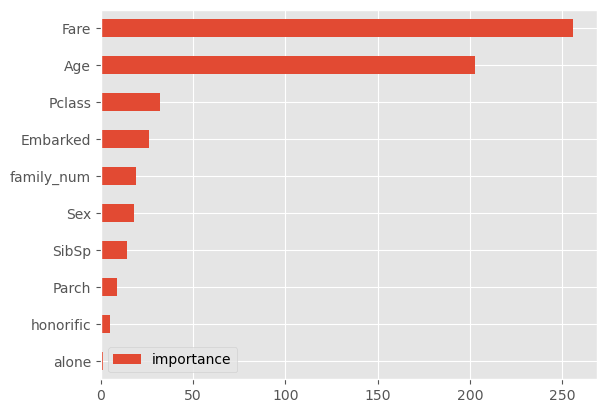

In [62]:
importance = pd.DataFrame(model_lgb.feature_importance(), index = X_train.columns, columns = ["importance"]).sort_values(by = "importance", ascending = True)
importance.plot.barh()

In [63]:
y_pred = model_lgb.predict(X_vaild, num_iteration = model_lgb.best_iteration)

In [64]:
# 정확도를 라이브러리를 이용해서 계산
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

### 예측 정확도

 - 진양성(TP) : 실제 값과 예측 값이 모두 1인 경우
 <br>
 
 - 위음성(FN) : 실제 값은 1이지만 예측 값이 0인 경우
 <br>
 
 - 위양성(FP) : 실제 값이 0이지만 예측 값이 1인 경우
 <br>
 
 - 진음성(TN) : 실제 값이 0이고 예측 값도 0인 경우
 
###     정확도 = $TP + TN\over TP + TN + FP + FN$

- learning_rate : 학습 속도로 각 과정의 학습을 어느 정도 반영할지 결정  기본값 : 0.1
<br>
    
- max_bin : 분기 한개에 들어가는 데이터의 최대값으로 클 경우 범용성이 높아진다  기본값 : 255
<br>

- num_leaves : 하나의 결정 트리에 포함된 최대 노드의 개수로 트리의 복잡성을 제어한다.  기본값 : 31
<br>

- min_data_in_leaf : 결정 트리중 하나의 가지에 할당되는 데이터의 수로 과도한 학습을 제어하기 위해 설정한다  기본값 : 20

In [66]:
# 하이퍼파라미터 변경하기
lgbm_params = {
    "objective" : "binary",
    "max_bin" : 331,
    "num_leaves" : 20,
    "min_data_in_leaf" : 57,
    "random_seed" : 1234
}

In [67]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = categories)
lgb_eval = lgb.Dataset(X_vaild, y_valid, categorical_feature = categories, reference = lgb_train)
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets = lgb_eval,
                      num_boost_round = 100,
                      early_stopping_rounds = 20,
                      verbose_eval = 10
                      )

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.470659
[20]	valid_0's binary_logloss: 0.425654
[30]	valid_0's binary_logloss: 0.413748
[40]	valid_0's binary_logloss: 0.410545
[50]	valid_0's binary_logloss: 0.412232
[60]	valid_0's binary_logloss: 0.407988
[70]	valid_0's binary_logloss: 0.407494
[80]	valid_0's binary_logloss: 0.410995
[90]	valid_0's binary_logloss: 0.413203
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.406565


In [68]:
y_pred = model_lgb.predict(X_vaild, num_iteration = model_lgb.best_iteration)
accuracy_score(y_valid, np.round(y_pred))

0.8491620111731844

In [71]:
# 교차 검증
folds = 3
kf = KFold(n_splits = folds)

In [72]:
models = []
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_vaild = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = categories)
    lgb_eval = lgb.Dataset(X_vaild, y_valid, categorical_feature = categories, reference = lgb_train)
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    y_pred = model_lgb.predict(X_vaild, num_iteration = model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))
    models.append(model_lgb)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.503031
[20]	valid_0's binary_logloss: 0.465863
[30]	valid_0's binary_logloss: 0.454056
[40]	valid_0's binary_logloss: 0.451228
[50]	valid_0's binary_logloss: 0.44724
[60]	valid_0's binary_logloss: 0.447342
[70]	valid_0's binary_logloss: 0.450126
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.445648
0.8249158249158249
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.482264
[20]	valid_0's binary_logloss: 0.440853
[30]	valid_0's binary_logloss: 0.435016
[40]	valid_0's binary_logloss: 0.433286
[50]	valid_0's binary_logloss: 0.432128
[60]	valid_0's binary_logloss: 0.430387
[70]	valid_0's binary_logloss: 0.431241
[80]	valid_0's binary_logloss: 0.438053
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.429561
0.8181818181818182
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss:

C:\Users\leedo\anaconda3\envs\kaggle_book\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [74]:
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [82]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)
# axis = 1을 하게 되면 열을 기준으로 연산이 되어 예측한 결과마다 다 더한 평균이 나와 구하는 값과 달라지게 된다

In [85]:
# 0.5보다 큰 경우 생존으로 
preds_int = (preds_mean > 0.5).astype(int)

In [86]:
submission["Survived"] = preds_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
# 나온 결과를 CSV 파일로 저장하기
submission.to_csv("./submit/titanic_submit01.csv", index = False) # index 행 번호 빼기

In [89]:
# 데이터 분석 - 티켓 등급별 인원수 확인하기
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)

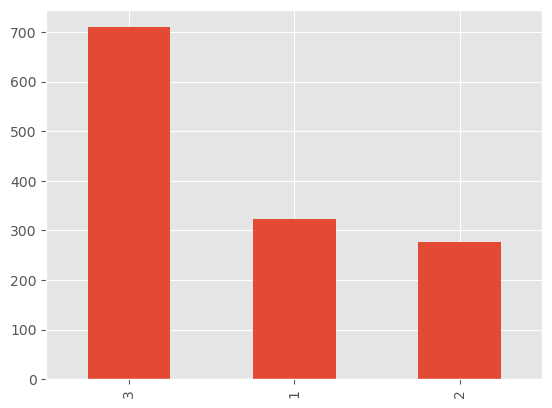

In [91]:
all_df.Pclass.value_counts().plot.bar()

In [92]:
all_df[["Pclass", "Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

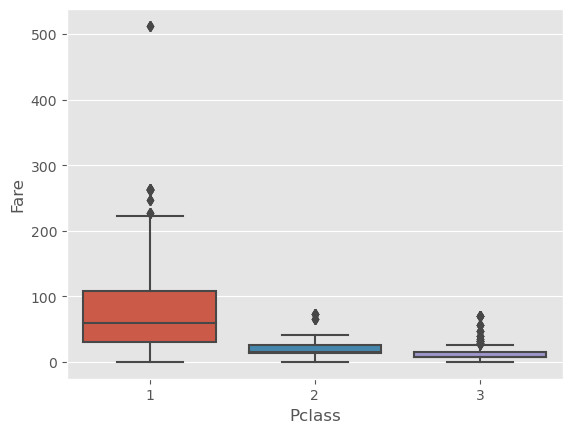

In [93]:
sns.boxplot(x = "Pclass", y = "Fare", data = all_df)

3등급의 고객이 1, 2등급의 2배정도의 인원을 보유하고 있다

1등급의 가격은 평균을 보면 2등급의 4배 3등급의 7배 정도이다

In [95]:
all_df['Pclass2'] = all_df['Pclass']

In [97]:
# 1등급의 상위 25%에 해당하는 108이상의 가격을 0등급으로 분류
all_df.loc[all_df['Fare'] > 108, 'Pclass2'] = 0
all_df[all_df['Pclass2'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [98]:
# 티켓 등급별 연령 분포 확인
all_df[["Pclass2", "Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

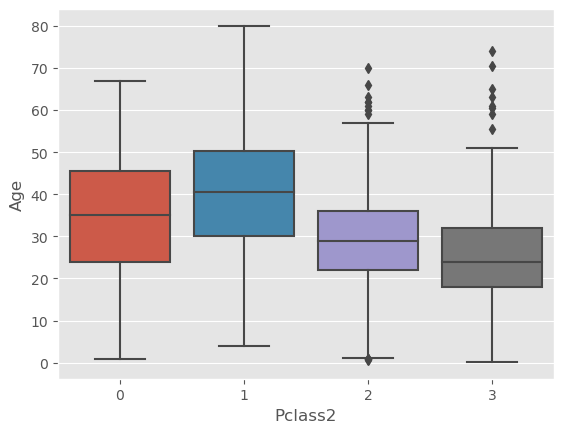

In [100]:
sns.boxplot(x = "Pclass2", y = "Age", data = all_df)

In [101]:
# 가족과 함깨 온 경우가 있으므로 15세 이상만 확인
all_df[all_df['Age'] > 15][["Pclass2", "Age"]].groupby("Pclass2").describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Pclass2                                                           
0         69.0  37.920290  13.428357  17.0  27.0  36.0  48.0  67.0
1        207.0  40.768116  13.780416  16.0  30.0  41.0  50.5  80.0
2        233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3        422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

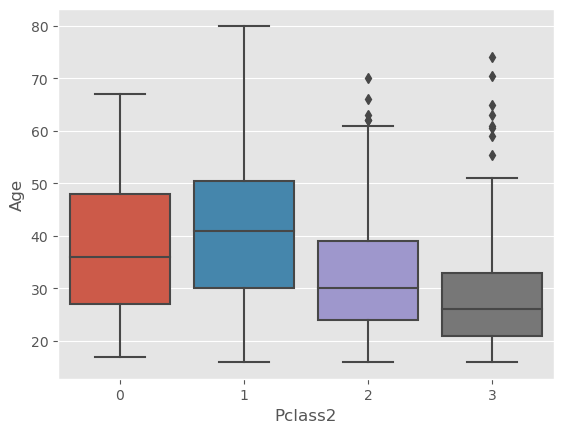

In [102]:
sns.boxplot(x = "Pclass2", y = "Age", data = all_df[all_df['Age'] > 15])

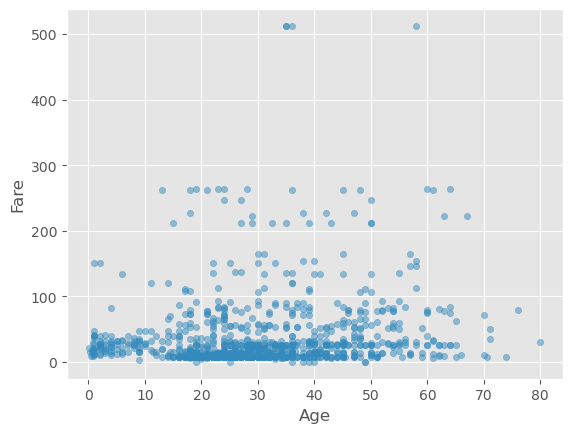

In [103]:
# 나이와 티켓 요금의 분포 확인
all_df.plot.scatter(x = "Age", y = "Fare", alpha = 0.5)

In [104]:
# 티켓 등급별 승선 가족 수 확인
all_df['family_num'] = all_df['SibSp'] + all_df["Parch"]
all_df[["Pclass2", "family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

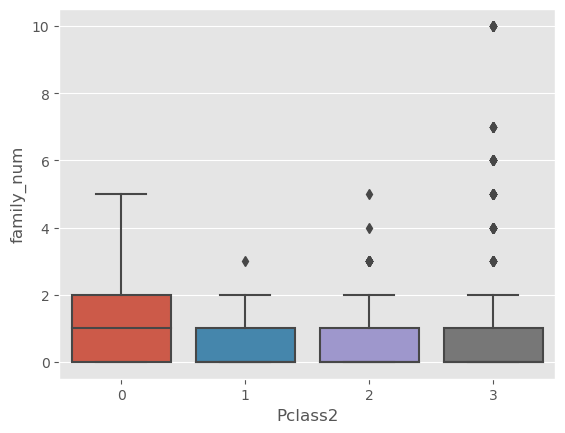

In [105]:
sns.boxplot(x = "Pclass2", y = "family_num", data = all_df)

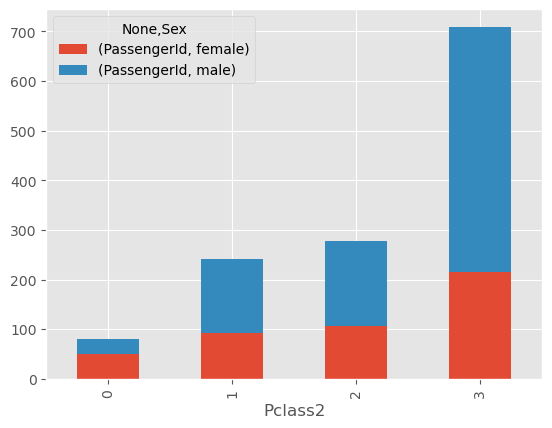

In [106]:
# 티켓 등급별 남녀 비율 확인
Pclass_gender_df = all_df[["Pclass2", "Sex", "PassengerId"]].dropna().groupby(["Pclass2", "Sex"]).count().unstack()
Pclass_gender_df.plot.bar(stacked = True)

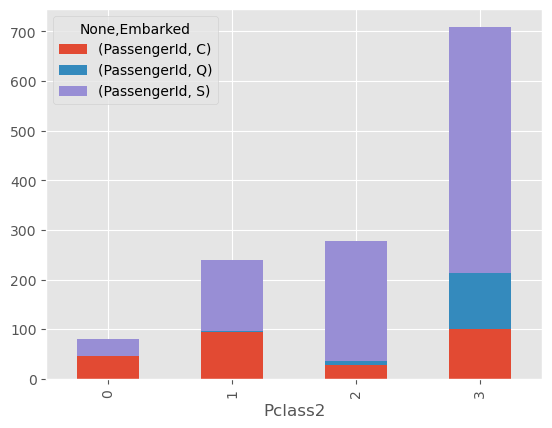

In [116]:
# 승선 항구별 차이
Pclass_emb_df = all_df[["Pclass2", "Embarked", "PassengerId"]].dropna().groupby(["Pclass2", "Embarked"]).count().unstack()
Pclass_emb_df = Pclass_emb_df.fillna(0)
Pclass_emb_df.plot.bar(stacked = True)

In [117]:
# 100% 누적 막대 그래프로 변환
Pclass_emb_df_ratio = Pclass_emb_df.copy()
Pclass_emb_df_ratio["sum"] = Pclass_emb_df_ratio["PassengerId", "C"] + Pclass_emb_df_ratio["PassengerId", "Q"] + Pclass_emb_df_ratio["PassengerId", "S"]
Pclass_emb_df_ratio["PassengerId", "C"] = Pclass_emb_df_ratio["PassengerId", "C"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId", "Q"] = Pclass_emb_df_ratio["PassengerId", "Q"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId", "S"] = Pclass_emb_df_ratio["PassengerId", "S"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop(["sum"], axis = 1)
Pclass_emb_df_ratio

PassengerId                    
Embarked           C         Q         S
Pclass2                                 
0           0.580247  0.000000  0.419753
1           0.391667  0.012500  0.595833
2           0.101083  0.025271  0.873646
3           0.142454  0.159379  0.698166

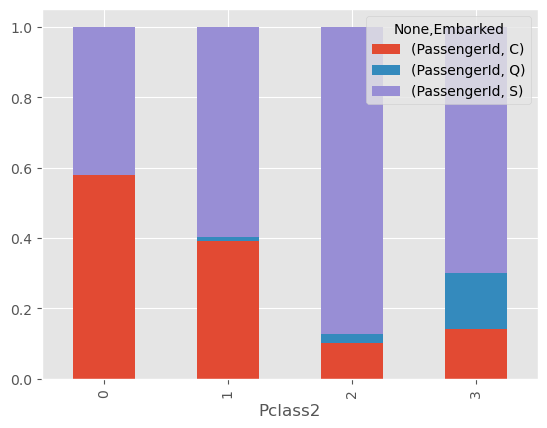

In [118]:
Pclass_emb_df_ratio.plot.bar(stacked = True)

### 결과 분석

- 0등급 : 동반자가 많고 여성 비율이 많다, 연령대가 높다, Cherbourg에서 승선한 사람이 많다
<br>

- 1등급 : 다른 등급보다 연령대가 가장 높다, 1인 승선률이 가장 높다
<br>

- 2등급 : Southampton에서 승선한 사람이 가장 많다, 대부분이 1등급과 3등급 사이이다.
<br>

- 3등급 : 탑승한 인원 분포가 다양하다, Queenstown에서 승선한 비율이 제일 높다



In [120]:
# 데이터 분석 - 특정 클러스터에 주목하기 (10대 20대 젊은 승객 분석)
C_young10 = all_df[(all_df['Embarked'] == "C") & (all_df['Age'] // 10 == 1) & (all_df["family_num"] == 0)]
C_young20 = all_df[(all_df['Embarked'] == "C") & (all_df['Age'] // 10 == 2) & (all_df["family_num"] == 0)]

In [121]:
len(C_young10), len(C_young20)

(7, 31)

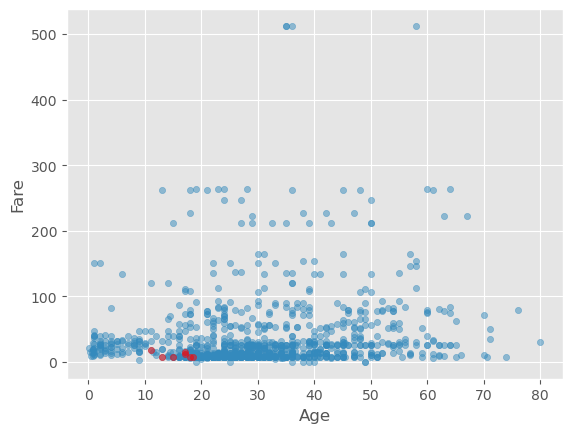

In [130]:
# 특정 클러스터 강조하기
ax = all_df.plot.scatter(x = "Age", y = "Fare", alpha = 0.5)
C_young10.plot.scatter(x = "Age", y = "Fare", color = "red", alpha = 0.5, ax = ax)

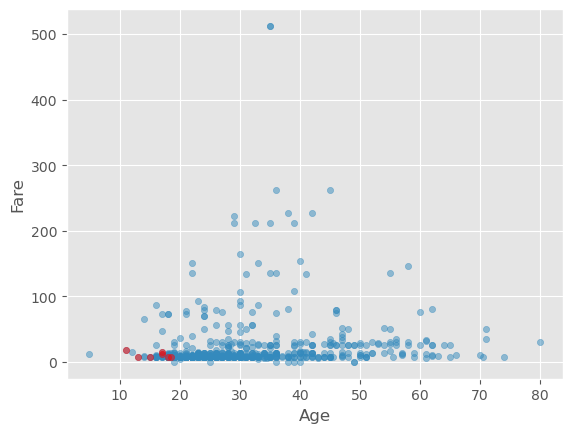

In [131]:
ax = all_df[all_df["family_num"] == 0].plot.scatter(x = "Age", y = "Fare", alpha = 0.5)
C_young10.plot.scatter(x = "Age", y = "Fare", color = "red", alpha = 0.5, ax = ax)

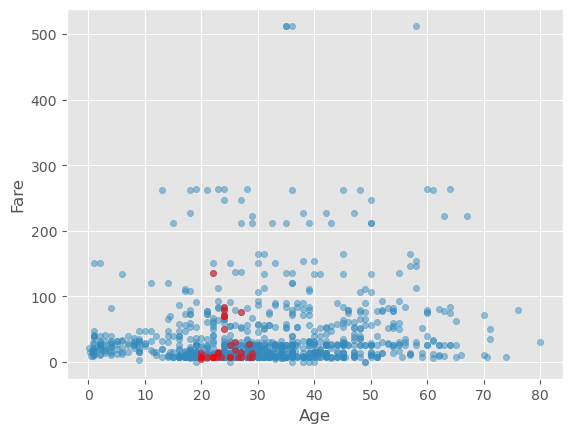

In [132]:
ax = all_df.plot.scatter(x = "Age", y = "Fare", alpha = 0.5)
C_young20.plot.scatter(x = "Age", y = "Fare", color = "red", alpha = 0.5, ax = ax)

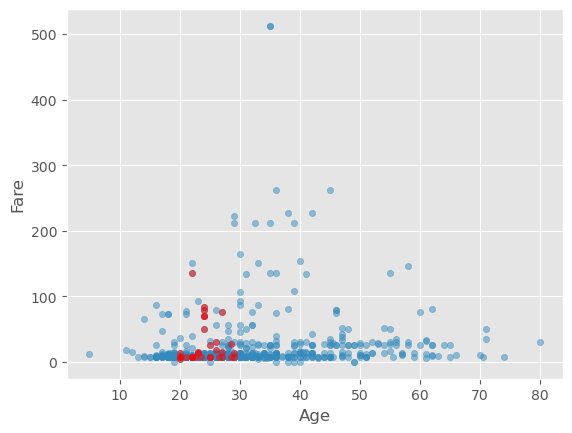

In [133]:
ax = all_df[all_df["family_num"] == 0].plot.scatter(x = "Age", y = "Fare", alpha = 0.5)
C_young20.plot.scatter(x = "Age", y = "Fare", color = "red", alpha = 0.5, ax = ax)

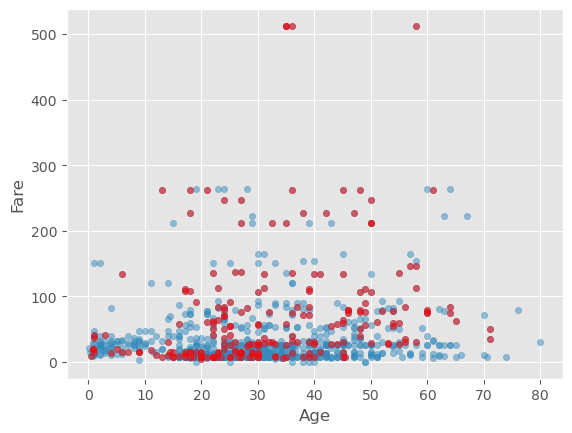

In [134]:
C_all = all_df[all_df["Embarked"] == "C"]
ax = all_df.plot.scatter(x = "Age", y = "Fare", alpha = 0.5)
C_all.plot.scatter(x = "Age", y = "Fare", color = "red", alpha = 0.5, ax = ax)

In [135]:
# 홀로 승선한 10대 승객의 항구별 평균요금 비교
all_df[(all_df["Age"] // 10 == 1) & (all_df["family_num"] == 0)][["Embarked", "Fare"]].groupby("Embarked").mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712
